In [96]:
from IPython.display import clear_output
import random
import time

from matplotlib import pyplot as plt
%pylab inline
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
class Person:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.status = 'b' # b - suseptible  r - infectous   k - recovered

    infection_time = 0
    nearest = []
    closest = 1
    closest_r = 1
    
class Population(Person):
    def __init__(self, N,r0 = .1, step = .1, social = False):
        self.N = N
        self.pop = []
        self.scale = 5
        self.stepsize = step
        self.social = social
        self.r0 = r0
        self.eraticated = False
        self.suseptible = N
        self.infected = 2
        self.recovered = 0
        self.SUS = []
        self.INFECT = []
        self.REC = []
        self.time = []
        self.t = 0
    def nearest(self):
        rstore=[]
        for i in range(0,self.N):
            radd = []
            rmin = self.scale
            closest = False
            for j in range(0,self.N):
                if j == i:
                    continue
                r = (self.pop[i].x-self.pop[j].x)**2+(self.pop[i].y-self.pop[j].y)**2
                if r <= .051: radd.append(j)
                if r < rmin:
                    closest = j
                    rmin = r
            rstore.append(radd)
            self.pop[i].nearest = radd
            self.pop[i].closest = closest
            self.pop[i].closest_r = rmin
            
    def create(self):    
        for i in range(0,self.N):
            a = random.random()
            self.pop.append(Person(self.scale*random.random(),self.scale*random.random()))
        
        self.pop[choice([i for i in range(0,self.N)])].status = 'r'
        self.pop[choice([i for i in range(0,self.N)])].status = 'r'
        self.nearest()
        
    def coordinates(self):
        coords = []
        for i in range(0,self.N):
            coords.append([self.pop[i].x,self.pop[i].y])
            
    def counter(self):
        n = self.N
        sus = 0
        infect = 0
        rec = 0
        
        for i in range(0,n):
            if self.pop[i].status == 'b':
                sus += 1
            elif self.pop[i].status == 'r':
                infect += 1
            elif self.pop[i].status == 'k':
                rec += 1
        self.t += 1
        self.time.append(self.t)
        self.suseptible = sus
        self.infected = infect
        self.recovered = rec
        self.SUS.append(sus)
        self.INFECT.append(infect)
        self.REC.append(rec)
        
    def pop_plot(self):
        plt.figure(figsize=(25,15))
        fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,12))
        
        #fig = plt.figure(figsize=(15,6))
        
        #ax1.xlim(0,self.scale)
        #ax1.ylim(0,self.scale)
        
        a = self.pop[3].nearest
        self.counter()
        
        for i in range(0,self.N):
            ax1.plot(self.pop[i].x,self.pop[i].y,c = self.pop[i].status, marker='o')
        
        ax2.plot(self.time, self.SUS,self.time,self.INFECT,self.time,self.REC)
#        print(a)
#        if a != []:
#            plt.plot(self.pop[3].x,self.pop[3].y,c = 'r', marker='*')
#            for j in a:
#                plt.plot(self.pop[j].x,self.pop[j].y,c = 'r', marker='*')
    
        
        plt.show()
        
    def update(self):
        n = self.N
        for i in range(0,n):
            if self.pop[i].status == 'r':
                
                if self.pop[i].infection_time < 14: 
                    self.pop[i].infection_time += 1
                else:
                    self.pop[i].status = 'k'
                    
                for j in self.pop[i].nearest:
                    if self.pop[j].status == 'b':
                        if random.random() <= self.r0: self.pop[j].status = 'r'
        a = []
        for i in range(0,n):
            if self.pop[i].status == 'r': a.append(1)
        if len(a) == 0:
            print("The virus has been eraticated....")
            self.eraticated = True
            
    def move(self):
        h = self.stepsize
        x_steps = [choice([-1,1])*h*random.random() for i in range(0, self.N)]
        y_steps = [choice([-1,1])*h * random.random() for i in range(0, self.N)]
        for i in range(0, self.N):
            
            if self.social:
                near = self.pop[i].closest
                newx = self.pop[i].x - h*(self.pop[near].x-self.pop[i].x+1.0e-8)/abs(self.pop[near].x-self.pop[i].x+1.0e-8)
                if newx >  self.scale:
                    self.pop[i].x = self.scale #x_steps[i]
                elif newx < 0:
                    self.pop[i].x = 0.01
                else:
                    self.pop[i].x = newx

                newy = self.pop[i].y - h*(self.pop[near].y-self.pop[i].y+1.0e-8)/abs(self.pop[near].y-self.pop[i].y + 1.0e-8)
                if newy >=  self.scale:
                    self.pop[i].y = self.scale-.1 #x_steps[i]
                elif newy < 0:
                    self.pop[i].y = 0.01
                else:
                    self.pop[i].y = newy
            else:
                newx = self.pop[i].x + x_steps[i]
                if newx >  self.scale or newx < 0:
                    self.pop[i].x -= x_steps[i]
                else:
                    self.pop[i].x += x_steps[i]
            
                newy = self.pop[i].y + y_steps[i]
                if newy > self.scale or newy < 0:
                    self.pop[i].y -= y_steps[i]
                else:
                    self.pop[i].y += y_steps[i]
        self.nearest()
        self.update()
        

   

Populating the interactive namespace from numpy and matplotlib


# My Simple SIR model

## this is a work in progres

Blue = suseptible
Red  = infected
Black = recovered

Dots go on a random walk and if they get to close to an infected person they have a probability (<1) of getting infected.  Infected people are infectous for 14 steps then move to recovered.  Recovered people cannot get infected again.  

Note: that this is in its early stages and I want to add more complex behaviour (i.e. social distancing, etc...)
Also Note: This is really slow... so sit back and enjoy a dram 

<Figure size 1800x1080 with 0 Axes>

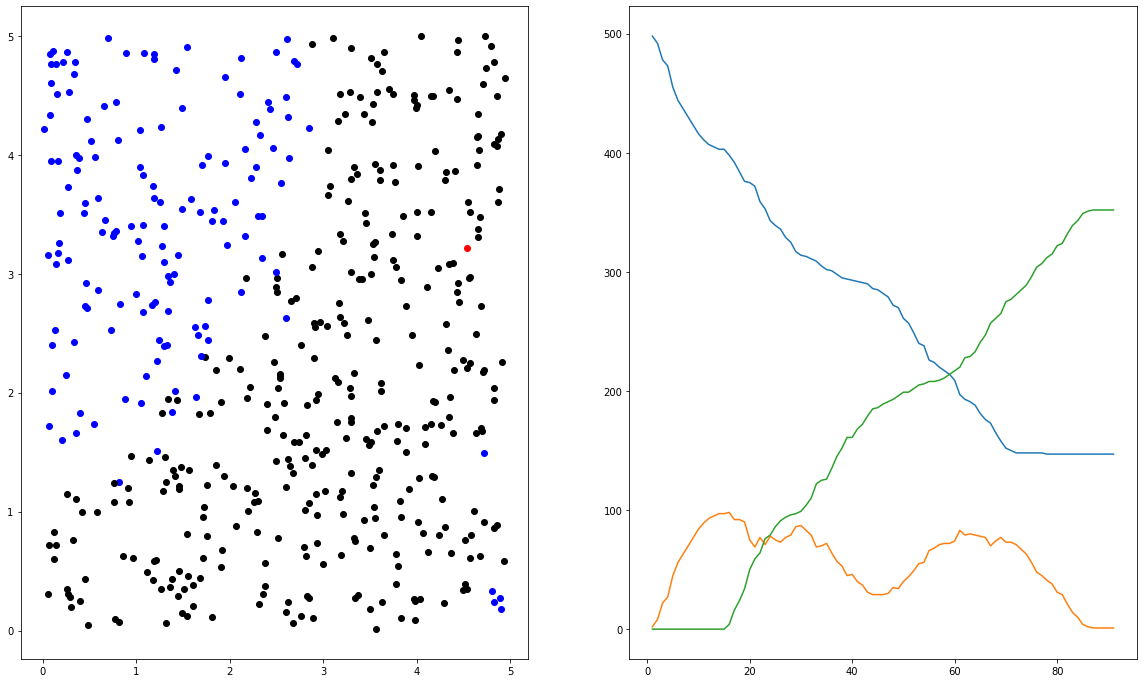

The virus has been eraticated....


In [99]:
Pp = Population(500,.39,.051,False)
Pp.create()

for i in range(0,200):
    if Pp.eraticated: break
    clear_output(wait=True)
    Pp.pop_plot()
    Pp.move()
    time.sleep(0.1)b

<Figure size 1800x1080 with 0 Axes>

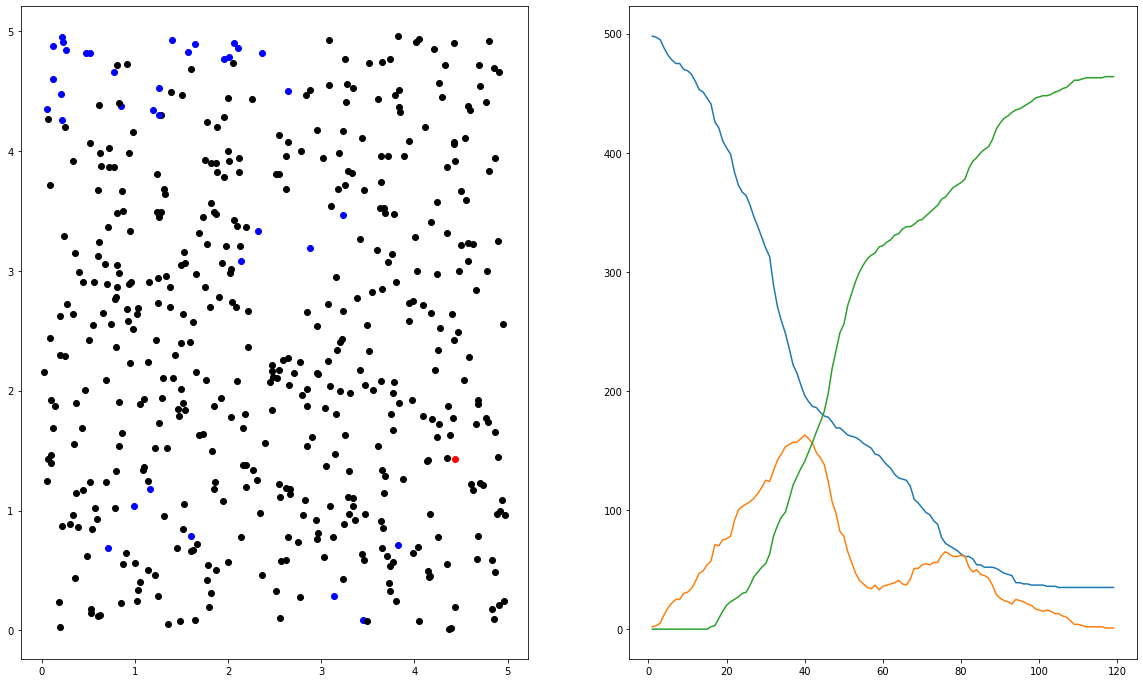

The virus has been eraticated....


In [100]:
Pp = Population(500,.39,.051,False)
Pp.create()

for i in range(0,200):
    if Pp.eraticated: break
    clear_output(wait=True)
    Pp.pop_plot()
    Pp.move()
    time.sleep(0.1)